# Tarea 9

## Derivación Númerica

##### Ejercicio 2. Utiliza tu función derivadaNumerica para calcular la derivada de la función  coscos  en un punto  $x_0∈[0,1)$. Grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos  h 's cada vez más pequeño.

In [11]:
f(x)=cos(x) #Definimos la función coseno.

f (generic function with 1 method)

In [12]:
function derivada_num(f,x,h) #Nombramos nuestra función "derivada númerica" con sus respectivas variables.
    
       df=(f(x+h)-f(x))/h #Introducimos la noción de derivada (la fórmula anteriormente vista).
    
end
    

derivada_num (generic function with 1 method)

In [13]:
derivada_num(g,0,0.0005) #Calculamos la derivada de coseno en el punto 0.

LoadError: [91mUndefVarError: g not defined[39m

In [14]:
-1*sin(0) #Esta es la respuesta exacta, a la que debe converger nuestra función.

-0.0

In [8]:
Pkg.add("PyPlot") #Instalamos las paqueterias para graficar.

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [9]:
using PyPlot

In [15]:
function derivada_num2(f,x)
list=zeros(100) #Se crea una lista de ceros donde se guardará el valor de la derivada
n=1
           for i in 1:100 
              df=(f(x+(1/n))-f(x))*n #Aplicamos la derivada
              list[i]=df; #Asignamos el valor de la derivada a un elemento de la lista
              n+=1 # se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list 
end

derivada_num2 (generic function with 1 method)

In [16]:
list1=derivada_num2(f,0) #Creamos una lista de valores para graficar

100-element Array{Float64,1}:
 -0.459698  
 -0.244835  
 -0.165129  
 -0.12435   
 -0.0996671 
 -0.0831406 
 -0.0713072 
 -0.0624187 
 -0.0554984 
 -0.0499583 
 -0.0454232 
 -0.0416426 
 -0.0384426 
  ⋮         
 -0.00561792
 -0.0055555 
 -0.00549445
 -0.00543473
 -0.00537629
 -0.0053191 
 -0.00526311
 -0.00520829
 -0.00515459
 -0.005102  
 -0.00505046
 -0.00499996

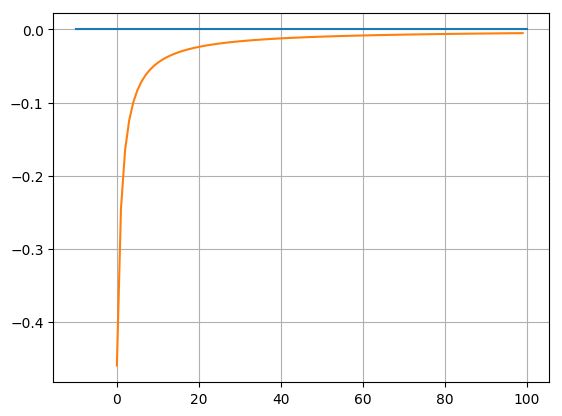

In [62]:
a=linspace(-10,100)
y=a*0
plot(a,y); #El valor de le derivada exacta
plot(real(list1)); #Se grafica la derivada respecto al numero de la iteración n=1/h
grid("on");

#### Ejercicio 3. Teniendo en mente la serie de Taylor para  f(x+h)f(x+h)  ¿existe alguna forma de mejorar el cálculo de la derivada numérica?

Veamos las dos series de taylor para la  $f$ en $h$ y $-h$:

$f(x+h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (h)^k}{k!}$ y $f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)\cdot (-h)^k}{k!}$

Ahora restando estas dos series obtenemos:

$$f(x+h)-f(x-h)=\sum_{k=0}^{\infty} \frac{f^{(k)(x)}}{k!}\cdot (h^k-(-h)^k)=\sum_{k=0}^{\infty} \frac{f^{(k)}(x)}{k!}\cdot (h^k+(-1)^{k+1}\cdot h^k)=\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!}$$

Entonces $\sum_{k=0}^{\infty} \frac{2f^{(2k+1)}(x)\cdot h^{2k+1}}{(2k+1)!} \approx 2f'(x)h$, esto si tomamos el primer término.

Por lo que tenemos: $$\Rightarrow\ f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}$$

__Pregunta:__¿Hay una forma de construir una derivada numérica aún mas exacta sin tener que hacer $h$ arbitrariamente pequeño?, ¿que opinas?

Pienso que no, debido a que la forma en que se contruye la funcion derivada implica aproximar cada vez más dos objetos, en nuestro caso hacer h (la diferencia) más pequeña cada vez nos acaerca a la respuesta correcta. Si no  variamos h y logramos que otra disminuyera para encontrar la derivada (ya que la derivada exige hacer pequeño algo) implicitamente haría que nuetra $h$ también lo hiciera.

#### Ejercicio 4. Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

In [1]:
function derivada_sim(f,x,h) #Creamos una función que toma como entradas la función , el punto a evaluar,h
              df=(f(x+h)-f(x-h))/2h #Aplicamos la fórmula
        
return df
end

derivada_sim (generic function with 1 method)

In [2]:
derivada_sim(f,0,0.001) #Probamos la función

LoadError: [91mUndefVarError: f not defined[39m

In [3]:
function derivada_sim2(f,x) #Realizamos lo mismo que en el ejercicio 2.
list=zeros(100)
n=1
           for i in 1:100
              df=(f(x+(1/n))-f(x-(1/n)))*n/2 
              list[i]=df; #Asignamos el valor de la derivada a un valor de la lista
              n+=1 #Se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list
end

derivada_sim2 (generic function with 1 method)

In [18]:
list2=derivada_sim2(f,pi/4) #Evaluamos las dos funciones en el mismo punto (tomando el punro pi/4)

100-element Array{Float64,1}:
 -0.59501 
 -0.67801 
 -0.694085
 -0.699764
 -0.702402
 -0.703838
 -0.704704
 -0.705267
 -0.705653
 -0.705929
 -0.706133
 -0.706289
 -0.70641 
  ⋮       
 -0.707092
 -0.707092
 -0.707093
 -0.707093
 -0.707093
 -0.707093
 -0.707094
 -0.707094
 -0.707094
 -0.707095
 -0.707095
 -0.707095

In [19]:
list3=derivada_num2(f,pi/4)

100-element Array{Float64,1}:
 -0.920065
 -0.851135
 -0.810849
 -0.787693
 -0.772877
 -0.762627
 -0.755126
 -0.749403
 -0.744896
 -0.741255
 -0.738252
 -0.735734
 -0.733593
  ⋮       
 -0.711064
 -0.711021
 -0.710978
 -0.710936
 -0.710895
 -0.710855
 -0.710815
 -0.710777
 -0.710739
 -0.710702
 -0.710666
 -0.710631

In [24]:
-sin(pi/4) #El valor exacto de la derivada

-0.7071067811865475

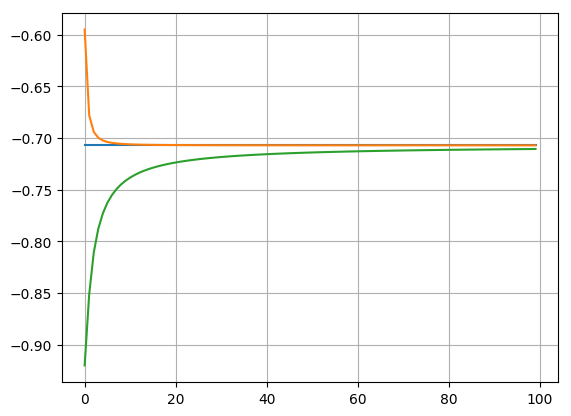

In [26]:
#Creamos una lista para colocarle el valor de la derivada exacta y de esta forma poder graficar hacia donde convergen las aproximaciones de nuestras funciones
list4=zeros(100) 
for i in 1:100
    list4[i]=-sin(pi/4)
end 
return list4

plot(list4);#Graficamos la soluciòn exacta de la derivada
plot(list2); #Graficamos ambas funciones evaluadas en el mismo punto
plot(list3);x=range(-10,100)
grid("on");

Podemos observar como ambas funciones(lineas amarillo y verde) se aproximan muy bien a la soluciòn exacta de la derivada(linea azul) que en nuestro caso es $-sen(x)$.

#### Ejercicio 5: Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente: $$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Analizando la serie de la diferencia finita hacia adelante podemos factorizar la función útilizando la propiedad de linealidad del operador derivada, antes pasando del lado izquierdo de la serie a $f(x)$:
$$\begin{eqnarray} f(x+h)-f(x)&=& \left[h \left. \frac{d}{d \xi} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}} \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}\ &=&\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x) \end{eqnarray}$$
Luego podemos definir el operador $\Delta_h$, el cual se define como:$$\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h).$$

Tomemos $l(x)=an(x)+bm(x)$ entonces:


$\Delta_hl(x)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}l(\xi)\right|_{\substack{ \xi=x }}$=$\Delta_h(an(x)+bm(x))=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}(an(\xi)+bm(\xi))\right|_{\substack{ \xi=x }}$

=$\sum_{n=1}^{\infty} \frac{1}{n!}h^n[\left.\frac{d^n}{d\xi^n}an(\xi)+\frac{d^n}{d\xi^n}an(\xi)]\right|_{\substack{ \xi=x }}=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}an(\xi)\right|_{\substack{ \xi=x }}+\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}bm(\xi)\right|_{\substack{ \xi=x }}$

$=a\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}n(\xi)\right|_{\substack{ \xi=x }}+b\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}(\xi)\right|_{\substack{ \xi=x}}$=$a\Delta_hn(x)+b\Delta_hm(x)$  $\Rightarrow\Delta_h$ es un operador lineal,

#### Ejercicio 6: Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. 
##### Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$
__Nota:__ En la clase se demostró que $\phi(x)=e^x-1$

Partiendo de la clase anterior podemos ver que $\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}=\frac{1}{h}\log\left(1+\Delta_h\right)$
$=\frac{1}{h}\left( \Delta_h-\frac{1}{2}\Delta^2_h +\dots\right)$
Entonces para relacionar el operador de la derivada exacta con el operador de diferencia finita hacia adelante notemos que podemos verla como una función $\phi$:
$\Delta_{h}=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\\xi=x}}.$

Tomando èste oparador $\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)^{n}$ y lo que sabemos de la exponencial por su expansiòn en serie de Taylor 
$\displaystyle e^{x}-1=\sum_{n=1}^{\infty}\frac{x^{n}}{n!}$, tenemos que
$\Delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-1,$

Por lo que despejando la derivada obtenemos: $\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\log\left(1+\Delta_{h}\right)$

De la misma forma podemos escribir esta funciòn de la forma: $$\:\:\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\sum_{n=1}^{\infty}\frac{(-1)^{n+1}}{n}\Delta_{h}^{\:n}=\frac{1}{h}\left(\Delta_{h}-\frac{1}{2}\Delta_{h}^{\:2}+\cdots\right)$$

Notamos de esta expresiòn que si se toma la serie hasta $n=1$ se obtiene la aproximación de la derivada numérica!. Por lo tanto podemos decir que entre más términos se tomen de la serie, la aproximación será cada vez mejor.